<center>
    <h1>
            Introduction to Python
    </h1></center><p><p>

<h3>Lesson seven: Some Statistics</h3>

13/05/2019

fabio.grassi@aalto.fi

When dealing with data, it is often necessary to perform statistical analysis, for example to compare the means of two samples. There are several Python libraries which provide statistical tools. Let us look at a few:

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

First, we are going to need some data. Using numpy's **random.randint** function, we are going to generate some random numbers taken from a Gaussian distribution.

In [7]:
a = [np.random.normal(0, scale=2) for i in range(10)]
b = [np.random.normal(2, scale=10) for i in range(10)]

Note that in the first list we passed 0 as argument to the **normal()** function, while in the second one we used 2. This means that our samples are taken from a gaussian distribution centered on x = 0 and x = 2, respectively. The two samples are therefore taken from two distinct populations. In a real world scenario, we would not have this information - if we did, we would not need to run a test in the first place. Usually, all we have are the values of the two samples, and we would have to try to determine whether the differences between the two are statistically significant. We will call **H0**, or **Null Hypothesis**, the scenario in which the two samples are drawn from the same distribution (i.e. there is no difference between the two), and **H1** or **Alternative Hypothesis** the scenario in which the two samples are drawn from different distributions. So, in short:
<br><br>
<center>H0: Null Hypothesis, a and b are "the same".</center>
<center>H1: Alternative Hypothesis, a and b are different.</center>

Let us see what our samples look like and then test the difference between our two samples now. We will use Student's t-test.

0.06435767689896234

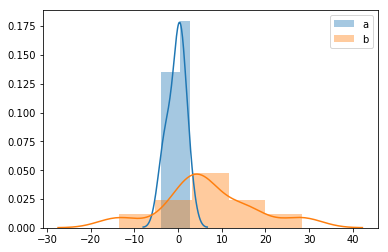

In [8]:
from scipy.stats import ttest_ind

sns.distplot(a,label="a")
sns.distplot(b,label="b")

plt.legend()

ttest_ind(a,b).pvalue

So, our test returns a p-value of 0.000025. What does this mean? What is the "p-value"?

The p-value tells us **what is the likelihood of observing a difference greater than or equal to the one in our samples, if the null hypothesis were true**. Let us try to reword this: suppose we were comparing the effect of two drugs on the platelet count of patients. The samples have a mean value of 200000 and 250000, respectively.  We do our test, and it returns a p-value of 0.09. This tells us that, **assuming the two drugs had exactly the same effect**, if we were to repeat the experiment n times we would observe a difference between the means greater than or equal to 50000 only **in 9% of our experiments**.

In scientific literature, the threshold for statistical significance is commonly set at **0.05**, and either way, it should be specified **before** running the experiment (otherwise one could simply say "my p-value is 0.10, I'm going to set my limit at 0.20 - it works!").

In our case, we did not declare a p-value, but as it is 0.000025, it is very strong evidence that our samples come from different distributions - which we already know they do.

This is all very nice, but it is not always that easy. Before doing any kind of statistical test, one must first know their data. The following flow chart illustrates the idea:

![Tests](https://image.slidesharecdn.com/choosingappropriatestatisticstestflowchart-171001164040/95/choosing-appropriate-statistics-test-flow-chart-1-638.jpg)

Looking at this flowchart, we can see that what we implicitly did was first to establish that our data was continuous, then we decided that we wanted to examine the difference between the means of our two groups, and because our samples were independent, normally distributed, and had the same variance, we correctly chose to use Student's t-test.

Let us now look at another example: suppose we were trying to sell a product online, and we wanted to try two different designs for our checkout page, one where the "Purchase" button was red, and the other blue. For both options we have the number of users who viewed the page but did not click, and the number of users who viewed the page and clicked. Following the flowchart above, we immediately see that our data is categorical this time ("click" vs. "no click"), so this time the appropriate tool is the Χ$^2$ test (pronounced "kee squared" or "ki squared"). We will use 0.05 as the threshold value to reject the null hypothesis.

In [9]:
red = [11,9] # 11 no click, 9 click.
blue = [5,15] # 5 no click, 15 click.

sp.stats.chi2_contingency([red,blue])

(2.604166666666667, 0.10658316957488823, 1, array([[ 8., 12.],
        [ 8., 12.]]))

We can see that even though the blue version seems more promising, based on this data alone we cannot reject the null hypothesis (p-value > 0.05).

Another example: this time we have taken soil samples from three different areas and we have measured the concentration of pollutants. We want to know if there are significant differences in the concentrations. This is the data we have collected:

In [32]:
area1 = [0.5, 0.8, 0.7, 0.4, 0.7]
area2 = [0.4, 0.1, 0.4, 0.2, 0.3]
area3 = [0.5, 0.3, 0.8, 0.7, 0.7]

Again, going back to our flowchart, we will see that:

1. Our data is continuous.
2. We want to investigate the differences in the means.

Now we need to determine whether the parametric assumptions are true. First: can our data said to be normally distributed? Let's find out, using a significance level of 0.05.

In [33]:
print(sp.stats.shapiro(area1))
print(sp.stats.shapiro(area2))
print(sp.stats.shapiro(area3))

(0.9136684536933899, 0.4899464547634125)
(0.9020198583602905, 0.4211500287055969)
(0.9053125381469727, 0.43994057178497314)


We just used the **Shapiro-Wilk test** for normality. The null hypothesis is that the sample is drawn from a normal distribution. In all three cases the p-value far exceeds the bar we set for significance, so we can assume that they are normally distributed. Now we have to check that they have the same variance. We can do so using **Levene's test**.

In [34]:
sp.stats.levene(area1,area2,area3)

LeveneResult(statistic=0.11999999999999993, pvalue=0.8879713821861919)

The p-value is 0.82, so we can confidently say that the samples have the same variance. The parametric assumptions are satisfied, meaning that we can perform an ANOVA (analysis of variance) test:

In [35]:
sp.stats.f_oneway(area1,area2,area3)

F_onewayResult(statistic=6.499999999999994, pvalue=0.01223059046400004)

It seems that our means are indeed different. At this point, we would normally perform a post hoc test such as Tukey's test, but I still cannot get it to work because the statsmodels library is... quirky, to put it nicely, so we will skip it for now.

Let us look at one last example: this time, we will import the boston dataset.

In [36]:
areas = pd.DataFrame(area1+area2+area3)
areas["x"] = ["a" for i in range(5)]+["b" for i in range(5)]+["c" for i in range(5)]

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(areas[0], areas["x"])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  a      b     -0.34   -0.6222 -0.0578  True 
  a      c     -0.02   -0.3022  0.2622 False 
  b      c      0.32    0.0378  0.6022  True 
---------------------------------------------
['a' 'b' 'c']


In [17]:
from sklearn.datasets import load_boston

data = load_boston()

Now we want to see how the different variables are correlated. To do this, we don't even need to use scipy: we can do everything in Pandas.

In [18]:
df = pd.DataFrame(data.data,
                  columns=data.feature_names)

In [20]:
cor = df.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


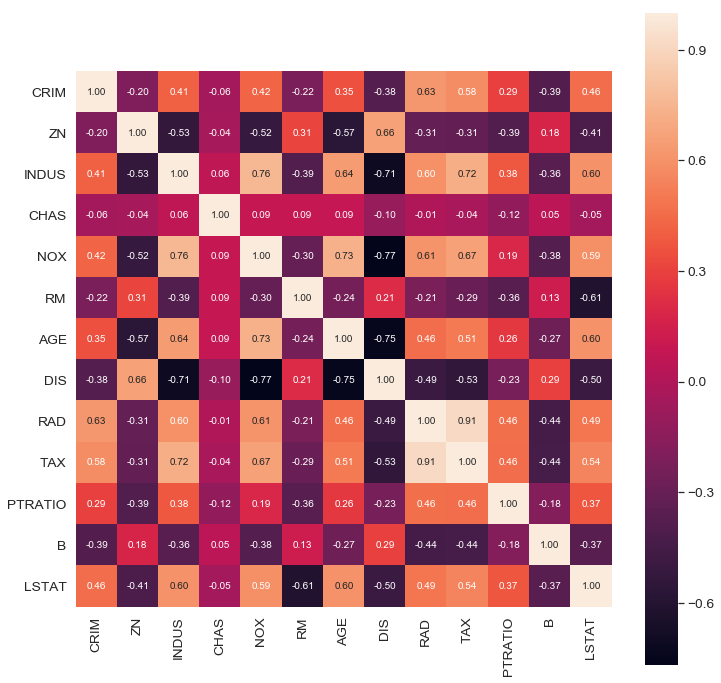

In [21]:
cor = df.corr()
sns.set(font_scale=1.25)

plt.figure(figsize=(12,12))

hm = sns.heatmap(cor, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=list(cor.columns), xticklabels=list(cor.columns))

plt.show()

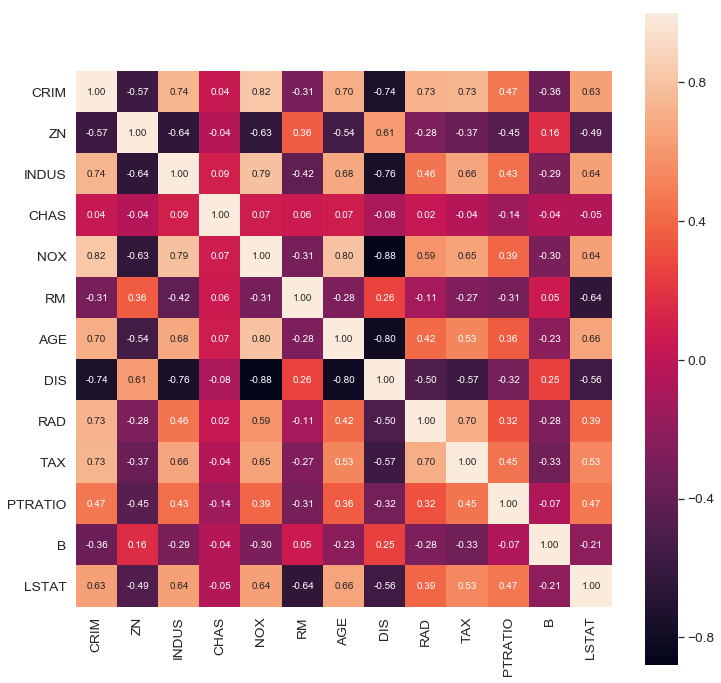

In [22]:
cor = df.corr(method="spearman")
sns.set(font_scale=1.25)

plt.figure(figsize=(12,12))

hm = sns.heatmap(cor, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=list(cor.columns), xticklabels=list(cor.columns))

plt.show()